<font color ='green' size = 8>Estudo de Monte Carlo e Aplicações</font>

# Introdução
Neste notebook manterei as minhas anotações de livros, estudos, testes e aplicações referentes a simulação de Monte Carlo. Tenho como objetivo abordar como aplicar e onde aplicar, trazendo os detalhes. No início de manterei anotado as referências utilizadas (quando utilizadas).

## Autor principal: 
Kaue Hermann Abbehausen

# Referências
1. Livro: A guide to monte carlo simulation in statistical physics

# Calculando integrais e valores
Para realizar isto imaginamos a função limitada por uma caixa entre valor *a* e *b*, valores do limite de integração. Jogamos vários pontos no gráficos e fazemos a razão dos pontos de cairam abaixo da linha da função pela quantidade total de ponto, e multiplicamos pela área total.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import random as rd
import pandas as pd

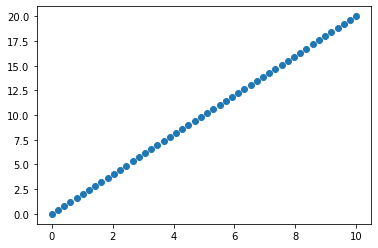

In [2]:
# Função desejada
x = np.linspace(0,10)
f = x*2
# a integral é=x^2/2
plt.scatter(x, f)

In [3]:
round(rd.uniform(0, 10), 2)

0.27

In [4]:
N = 100000
Ni = 0
for i in range(N):
    
    nr = [round(rd.uniform(0, 10.01), 2),round(rd.uniform(0, 20.01), 2)]
    fnr = nr[0]*2
    if fnr<nr[1]:
        Ni+=1
I2 = integrate.quad(lambda x: x*2,0,10)
I = (Ni/N)*(10*20)
print(f'Valores abaixo da função: {Ni}\n Integral por integrate: {I2[0]}\n Integral Monte Carlo: {I}')

Valores abaixo da função: 50056
 Integral por integrate: 100.0
 Integral Monte Carlo: 100.112


## Fazendo integral do cosseno

In [5]:
limite_i = 0
limite_f = 2*np.pi
Ni = 0
# funcao
f = lambda x: np.cos(x)
x = np.linspace(0,2*np.pi,1000)

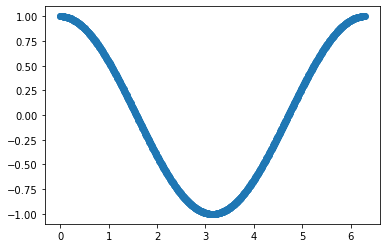

In [6]:
plt.scatter(x,f(x))

In [7]:
N = 1000
Val_Nr = []
Val_cor = []
for i in range(N):
    Nr = [round(rd.uniform(0, np.pi*2), 2),round(rd.uniform(-1,1), 2)]
    Val_Nr.append(Nr)
    if f(Nr[0]) > Nr[1] and Nr[1]>=0:
        Ni += 1
        Val_cor.append('green')
    elif f(Nr[0]) < Nr[1] and Nr[1]<=0:
        Ni += 1
        Val_cor.append('green')
    else:
        Val_cor.append('red')
        
        
I2 = integrate.quad(f,limite_i,limite_f)
I = (Ni/N)*(f(x)[-2]-f(x)[0])*(2)
print(f'Valores abaixo da função: {Ni}\n Integral por integrate: {I2[0]}\n Integral Monte Carlo: {I}')

Valores abaixo da função: 318
 Integral por integrate: 4.3598356225107897e-16
 Integral Monte Carlo: -1.2579241317453693e-05


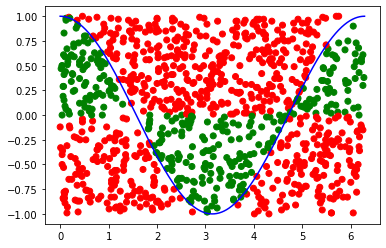

In [8]:
plt.scatter(np.array(Val_Nr).T[0],np.array(Val_Nr).T[1], marker = 'o', c = Val_cor)
plt.plot(x,f(x), color = 'blue')


## Anotações de testes:
**Temos que prestar atenção há detalhes importantes:**
1. A forma do gráfico para verificar quais pontos são aceitos e quais pontos não são.
2. Podemos aumentar o número de ponto na hora de pegar os valores da função desejada. E temos que tomar cuidado por podemos zerar a área com estes pontos.
3. Tomar cuidado com as condições. Caso estejam erradas a conta sairá errada

# Simulando Decaimento Radioativo

In [9]:
N = 10000 #Número de Núcleos
dt = 1 #elemento de tempo
tf = 200 #tempo final
t = 0
p =0.2
Val = []
while t<tf:
    t+= dt
    Ni = 0
    for i in range(N):
        if round(rd.uniform(0, np.pi*2), 2)< p:
            Ni += 1
    N -= Ni
    Val.append([t,N])

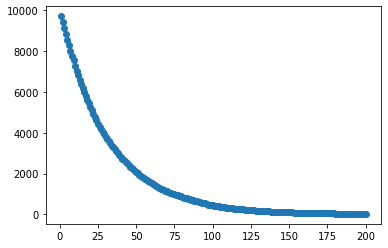

In [10]:
plt.scatter(np.array(Val).T[0],np.array(Val).T[1])

# Modelo de Ising

In [11]:
gradei = np.ones((10,10))
gradei

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [12]:
def calc_E(grade,linha, coluna):
    l = linha
    c = coluna
    #print(l,c)
    E = 2*(grade[(l+1)%10][c] + grade[(l-1)%10][c] + grade[l][(c+1)%10] + grade[l][(c-1)%10])
    #print(E)
    
    return E
    

In [13]:
N =100
gradei = np.ones((10,10))
grades = np.ones((10,10))
for i in range(N*1):
    for x in  range(9):
        for y in range(9):
            #print(gradei)
            s = gradei[x,y]
            dE = calc_E(gradei, x,y)*s
            #print(np . exp ( - dE/10  ))
            if dE < 0:
                gradei[x,y] *= -1
            elif np.random.rand() < np . exp ( - dE /10 ):
                gradei[x,y] *= -1
    grades = np.concatenate((grades,gradei))
    

In [14]:
len(grades)

1010

In [15]:
grades.shape

(1010, 10)

In [16]:
grades = grades.reshape((101,100))

In [17]:
grades[0].shape

(100,)

In [18]:
grades[0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

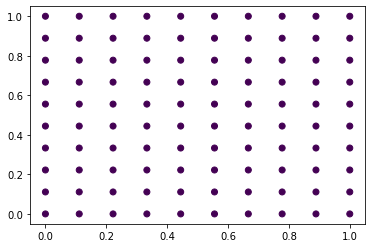

In [19]:
fig, ax = plt.subplots()
dots = np.linspace(0, 1, 10)
X, Y = np.meshgrid(dots, dots)
x, y = X.ravel(), Y.ravel()
ax.scatter(x, y, c=grades[0])

## Animação do Modelo de Ising 

In [20]:
import matplotlib.animation as animation
from IPython.display import HTML

MovieWriter ffmpeg unavailable; using Pillow instead.


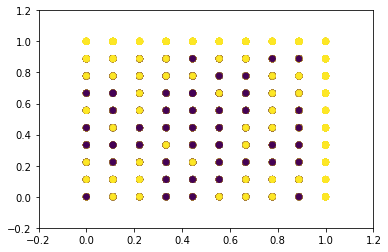

In [21]:
fig, ax = plt.subplots()
plt.xlim(-0.2,1.2)
plt.ylim(-0.2,1.2)

def plots(idx):
    dots = np.linspace(0, 1, 10)
    X, Y = np.meshgrid(dots, dots)
    x, y = X.ravel(), Y.ravel()
    ax.scatter(x, y, c=grades[idx])

anim = animation.FuncAnimation(fig, plots, frames = N, interval = 500 , blit = False)
anim.save('anim.gif')
#plots(2)

## Continuação Modelo de Ising

In [22]:
def calc_E(grade,l, c):
    E = 2*(grade[(l+1)%10][c] + grade[(l-1)%10][c] + grade[l][(c+1)%10] + grade[l][(c-1)%10])
    #print(E)
    
    return E

In [23]:
def energiat(grade):
    E = 0
    for x in range(10):
        for y in range(10):
            e = (grade[(x+1)%10][y] + grade[(x-1)%10][y] + grade[x][(y+1)%10] + grade[x][(y-1)%10])
            E += e*grade[x,y]
    return E

(10, 10)


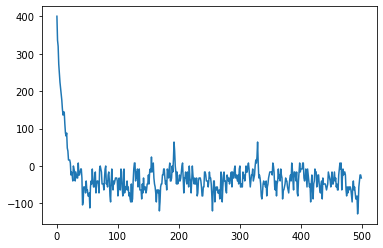

In [24]:
N = 500
L = 10
grade = np.ones((L,L))
print(grade.shape)
E_list =[[],[]]
for i in range(N):
    E = energiat(grade)
    E_list[0].append(E)
    E_list[1].append(E*E)
    for x in range(L):
        for y in range(L):
            spin = grade[x,y]
            #print(f'Spin {spin}')
            V =  calc_E(grade,x,y)
            Ei = spin * V
            Ef = -spin * V
            if Ef < Ei:
                grade[x,y] *= -1
            elif np.random.rand() < np.exp(-(Ef-Ei)/20):
                grade[x,y] *= -1
                

plt.plot(range(N),E_list[0])

In [25]:
df = pd.DataFrame(np.array(E_list).T, columns = ['E','E*2'])
df

,E,E*2
0,400.0,160000.0
1,336.0,112896.0
2,320.0,102400.0
3,272.0,73984.0
4,248.0,61504.0
...,...,...
495,-56.0,3136.0
496,-40.0,1600.0
497,-24.0,576.0
498,-24.0,576.0


In [26]:
df.describe()

,E,E*2
count,500.000000,500.000000
mean,-30.880000,3795.712000
std,53.365094,11425.136583
min,-128.000000,0.000000
25%,-56.000000,576.000000
50%,-40.000000,1600.000000
75%,-16.000000,3136.000000
max,400.000000,160000.000000


$$ C_v = \frac{<E^2> - <E>^2 }{k.T^2}$$